# 2019122064 오다건

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import norm, gamma, gaussian_kde
import matplotlib.pyplot as plt
from random import random, seed

# 4.7.(a)

Sample at least 5000 y values from the posterior distribution.

In [39]:
#sigma : inverse gamma 
sigma = gamma.rvs(a=10,scale =1/2.5, size=50)


In [48]:
theta_mc = []
for i in range(len(sigma)):
    theta_mc.append(norm.rvs(loc=4.1, scale = np.sqrt((1/sigma[i])/20), size=20))

y_mc = []
for i in range(len(sigma)):
    sigma_matrix = sigma[i]
    for j in range(len(theta_mc[i])):
        theta = theta_mc[i][j]
        y_mc.append(0.31 * norm.rvs(loc = theta, scale = np.sqrt(1/sigma[i]), size = 20) + 
                    0.46 * norm.rvs(loc = 2 * theta, scale = 2 * np.sqrt(1/sigma[i]), size = 20) +
                    0.23 * norm.rvs(loc = 3 * theta, scale = 3 * np.sqrt(1/sigma[i]), size = 20))
        
y_mc = np.array(y_mc).flatten()

In [49]:
len(y_mc) #5000개 이상

20000

In [50]:
y_mc

array([8.60670946, 6.93014229, 7.71154122, ..., 8.01156988, 7.76660115,
       8.45225133])

# (b)

75% quantile based confidence interval for a new value of Y

In [51]:
CI_lower, CI_upper = np.quantile(y_mc, 0.125), np.quantile(y_mc, 0.875)

In [52]:
CI_lower, CI_upper

(7.121478813462581, 8.615257939597724)

# (C)

(array([8.18193361e-04, 4.09096680e-04, 8.18193361e-04, 1.22729004e-03,
        2.86367676e-03, 2.86367676e-03, 6.54554689e-03, 1.14547071e-02,
        1.14547071e-02, 2.57730909e-02, 4.29551514e-02, 4.82734083e-02,
        7.85465626e-02, 1.04319654e-01, 1.49320288e-01, 1.97184600e-01,
        2.73685679e-01, 3.24413668e-01, 3.75959849e-01, 4.77006729e-01,
        5.13007237e-01, 5.94826573e-01, 6.31645275e-01, 6.07099474e-01,
        6.23054244e-01, 5.82962770e-01, 5.00325240e-01, 4.49597252e-01,
        3.84959976e-01, 2.87185870e-01, 2.44639815e-01, 1.99230083e-01,
        1.26001778e-01, 8.79557863e-02, 6.91373390e-02, 4.54097315e-02,
        3.15004444e-02, 2.08639307e-02, 1.96366407e-02, 9.40922365e-03,
        6.95464357e-03, 2.86367676e-03, 5.72735353e-03, 8.18193361e-04,
        0.00000000e+00, 0.00000000e+00, 4.09096680e-04, 0.00000000e+00,
        4.09096680e-04, 4.09096680e-04]),
 array([ 5.01597725,  5.13819775,  5.26041825,  5.38263875,  5.50485924,
         5.62707974, 

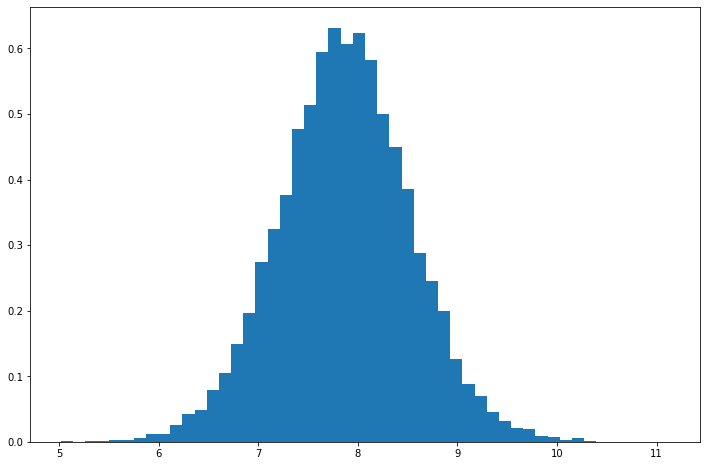

In [55]:
plt.figure(figsize=(12,8))
plt.hist(y_mc, bins=50,density=True)

(2) sort these discrete probabilites in decreasing order

In [60]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(y_mc, bw_method='silverman') #constant로 바꿔줌
y = np.arange(5,11,0.01)
kde_prob = kde(y)

In [61]:
kde_prob[0]

0.0003374591698880808

(3) Find the first probability value such that thee cumulative sum of y which have a discretized probability greater than this cut off

->`모르겠음`


## Modified Ehrenfest Model

In [64]:
import numpy as np
import pandas as pd
from random import seed
from random import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation


P = np.array([[0.5, 0.5, 0, 0, 0, 0],
              [0.1, 0.5, 0.4, 0, 0, 0],
              [0, 0.2, 0.5, 0.3, 0, 0],
              [0, 0, 0.3, 0.5, 0.2, 0],
              [0, 0, 0, 0.4, 0.5, 0.1],
              [0, 0, 0, 0, 0.5, 0.5]])


(b)P^10, P^50, P^100

In [72]:
P_10 = P.copy()
for i in range(10):
    P_10 = P_10.dot(P)

In [75]:
P_10

array([[0.04581862, 0.19763594, 0.33704986, 0.28341519, 0.11713152,
        0.01894886],
       [0.03952719, 0.18063857, 0.32815787, 0.29593513, 0.13231494,
        0.0234263 ],
       [0.03370499, 0.16407894, 0.31832745, 0.30757955, 0.14796756,
        0.02834152],
       [0.02834152, 0.14796756, 0.30757955, 0.31832745, 0.16407894,
        0.03370499],
       [0.0234263 , 0.13231494, 0.29593513, 0.32815787, 0.18063857,
        0.03952719],
       [0.01894886, 0.11713152, 0.28341519, 0.33704986, 0.19763594,
        0.04581862]])

In [78]:
P_50 = P.copy()
for i in range (50):
    P_50=P_50.dot(P)

P_50

array([[0.03125178, 0.15625535, 0.31250357, 0.31249643, 0.15624465,
        0.03124822],
       [0.03125107, 0.15625321, 0.31250214, 0.31249786, 0.15624679,
        0.03124893],
       [0.03125036, 0.15625107, 0.31250071, 0.31249929, 0.15624893,
        0.03124964],
       [0.03124964, 0.15624893, 0.31249929, 0.31250071, 0.15625107,
        0.03125036],
       [0.03124893, 0.15624679, 0.31249786, 0.31250214, 0.15625321,
        0.03125107],
       [0.03124822, 0.15624465, 0.31249643, 0.31250357, 0.15625535,
        0.03125178]])

In [79]:
P_100 = P.copy()
for i in range (100):
    P_100=P_100.dot(P)

P_100

array([[0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125],
       [0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125],
       [0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125],
       [0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125],
       [0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125],
       [0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125]])

(c)take different initial states of i=0 and i=3 and i=5

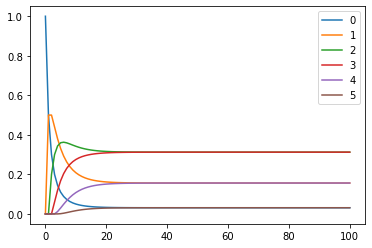

In [80]:
state1=np.array([[1,0,0,0,0,0]])
state1_hist=state1

#number of fleas on Mac at t = 100'=x

for i in range(100):
    #state1과 P 내적 처리 한것. 
    state1=np.dot(state1, P)
    #print(state1, (x+1))
    state1_hist=np.append(state1_hist, state1, axis=0)

state1_hist=pd.DataFrame(state1_hist)
state1_hist.plot()
plt.show()

In [81]:
#state=np.array([[1, 0, 0, 0, 0, 0]])
#stateHist=state
#dfStateHist=pd.DataFrame(state)
#distr_hist = [[0,0,0,0,0,0]]
#for x in range(100):
#  state=np.dot(state,P);
#  print(state,(x+1));
#  stateHist=np.append(stateHist,state,axis=0);
#  dfDistrHist = pd.DataFrame(stateHist);
#dfDistrHist.plot()
#plt.show()

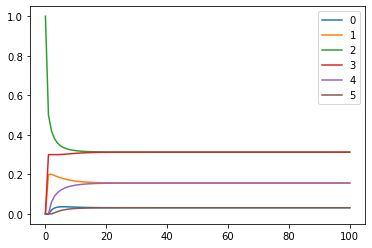

In [85]:
state2=np.array([[0,0,1,0,0,0]])
state2_hist=state2

#number of fleas on Mac at t = 100'=x

for i in range(100):
    #state2과 P 내적 처리 한것. 
    state2=np.dot(state2, P)
    #print(state2, (x+1))
    state2_hist=np.append(state2_hist, state2, axis=0)

state2_hist=pd.DataFrame(state2_hist)
state2_hist.plot()
plt.show()

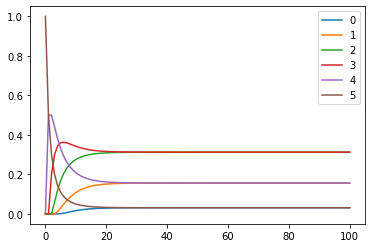

In [87]:
state3=np.array([[0,0,0,0,0,1]])
state3_hist=state3

#number of fleas on Mac at t = 100'=x

for i in range(100):
    #state3과 P 내적 처리 한것. 
    state3=np.dot(state3, P)
    #print(state2, (x+1))
    state3_hist=np.append(state3_hist, state3, axis=0)

state3_hist=pd.DataFrame(state3_hist)
state3_hist.plot()
plt.show()

(d) Binomial 과 비교


{0: 1632, 1: 7964, 2: 15564, 3: 15426, 4: 7901, 5: 1514}


(array([0.03263935, 0.15927681, 0.31127377, 0.30851383, 0.15801684,
        0.03027939]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Patch objects>)

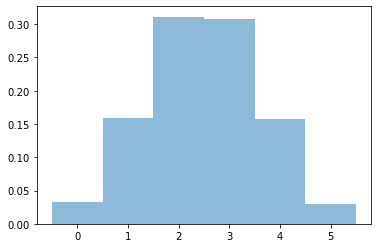

In [89]:
np.random.seed(1)
chain=0
chainHist=chain
for i in range(50000):
    pb=P[chain]
    pb=np.array(pb).flatten()
    chain=np.random.choice(6,1,p=pb) #0,1,2,3,4,5 중 1개 
    chainHist=np.append(chainHist,chain)

count={}
for i in chainHist:
    try: count[i] += 1
    except: count[i]=1
print(count)


plt.hist(chainHist, bins=np.linspace(-0.5,5.5,7),alpha=0.5, density=True, label = 'MCMC')

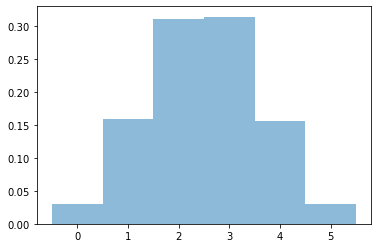

In [92]:
bi=np.random.binomial(5, 0.5, 50000)
plt.hist(bi,bins=np.linspace(-0.5,5.5,7), alpha=0.5, density=True)
plt.show()